ARRESTED DEVELOPMENT RATINGS
WHAT ARE THE BEST AND WORST MOMENTS IN ARRESTED DEVELOPMENT

STEP 1: IMPORT THE DATA

In [2]:
# Reading TSV files using pandas
import pandas as pd
# import os


# Assign file name to a variable
ep_file_path = 'title.episode.tsv.gz' # contains IMDB's full repository of episodes
rate_file_path = 'title.ratings.tsv.gz' # contains IMDB's full repository of ratings
akas_file_path = 'title.akas.tsv.gz' # contains IMDB's full repository of generic show info, including name


# Use .read_csv() with args to unzip the tsv.gz for each file 
ep = pd.read_csv(ep_file_path, sep='\t', compression = 'gzip')
rate = pd.read_csv(rate_file_path, sep='\t', compression = 'gzip')
akas = pd.read_csv(akas_file_path, sep='\t', compression = 'gzip')

# print(os.getcwd()) # Check where the working directory is
# # Run this to check whether file is in the correct directory:
# if os.path.exists(file_path):
#     df = pd.read_csv(file_path, sep='\t', compression='gzip')
# else:
#     print("File does not exist.")

/var/folders/n4/lff0x4bd7h137vxw7zpjzwn00000gq/T/ipykernel_82717/692151625.py:15: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  akas = pd.read_csv(akas_file_path, sep='\t', compression = 'gzip')


In [222]:
titles_file_path = 'ATLA episode title data.csv'
titles = pd.read_csv(titles_file_path, sep=',')
titles

,seasonNumber,episodeNumber,episodeTitle
0,1,1,The Boy in the Iceberg
1,1,2,The Avatar Returns
2,1,3,The Southern Air Temple
3,1,4,The Warriors of Kyoshi
4,1,5,The King of Omashu
5,1,6,Imprisoned
6,1,7,"The Spirit World (Winter Solstice, Part 1)"
7,1,8,"Avatar Roku (Winter Solstice, Part 2)"
8,1,9,The Waterbending Scroll
9,1,10,Jet


STEP 2: DATA PREP

In [140]:
# Brief look at the structure of the data
display(ep,rate,akas)

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0041951,tt0041038,1,9
1,tt0042816,tt0989125,1,17
2,tt0042889,tt0989125,\N,\N
3,tt0043426,tt0040051,3,42
4,tt0043631,tt0989125,2,16
...,...,...,...,...
7658160,tt9916846,tt1289683,3,18
7658161,tt9916848,tt1289683,3,17
7658162,tt9916850,tt1289683,3,19
7658163,tt9916852,tt1289683,3,20


,tconst,averageRating,numVotes
0,tt0000001,5.7,1990
1,tt0000002,5.8,265
2,tt0000003,6.5,1854
3,tt0000004,5.5,178
4,tt0000005,6.2,2640
...,...,...,...
1335970,tt9916730,8.3,10
1335971,tt9916766,7.0,22
1335972,tt9916778,7.2,36
1335973,tt9916840,8.8,6


,titleId,title
0,tt0000001,Карменсіта
1,tt0000001,Carmencita
2,tt0000001,Carmencita - spanyol tánc
3,tt0000001,Καρμενσίτα
4,tt0000001,Карменсита
...,...,...
36788269,tt9916852,Episódio #3.20
36788270,tt9916852,Episodio #3.20
36788271,tt9916852,एपिसोड #3.20
36788272,tt9916856,The Wind


In [137]:
## Here, we cross-reference the above tables to determine which data we need and which we can drop.
## We see in the akas_df the 'titleId' and 'title' columns which contain the name of the show we are searching 
## for as well as the ID, which we can see shares the structure of the 'tconst' and 'parentTconst' columns in
## ep_df and rate_df. Since both ep_df and rate_df lack a 'title' column, we will need the ID to work with each table.

print(akas.columns) # check the columns list of akas_df
akas = akas.drop(['ordering','region','language','types','attributes','isOriginalTitle'],axis=1) # Drop columns

a_df = akas.loc[akas['title'] == 'Avatar: The Last Airbender'] # Filter for the title we are interested in
print(a_df) # View updated table

Index(['titleId', 'ordering', 'title', 'region', 'language', 'types',
       'attributes', 'isOriginalTitle'],
      dtype='object')
            titleId                       title
1949132   tt0417299  Avatar: The Last Airbender
1949133   tt0417299  Avatar: The Last Airbender
1949134   tt0417299  Avatar: The Last Airbender
1949139   tt0417299  Avatar: The Last Airbender
1949140   tt0417299  Avatar: The Last Airbender
1949146   tt0417299  Avatar: The Last Airbender
1949147   tt0417299  Avatar: The Last Airbender
1949153   tt0417299  Avatar: The Last Airbender
1949154   tt0417299  Avatar: The Last Airbender
1949159   tt0417299  Avatar: The Last Airbender
1949170   tt0417299  Avatar: The Last Airbender
1949171   tt0417299  Avatar: The Last Airbender
1949172   tt0417299  Avatar: The Last Airbender
1949173   tt0417299  Avatar: The Last Airbender
1949176   tt0417299  Avatar: The Last Airbender
1949177   tt0417299  Avatar: The Last Airbender
1949179   tt0417299  Avatar: The Last Airbender
323

In [148]:
## Filter and sort episode data. In the previous cell, we see that the 'titleId' that we are interested in is 'tt0367279.'
## Given that, we will create a new DataFrame called episodes which we contain the episode data that matches the 
## 'titleId' we found. Our first data entry is S1E0, which is not apart of the official show, so we will remove our 
## first row from the data

episodes = pd.DataFrame(ep.loc[ep['parentTconst'] == 'tt0417299'])
episodes['episodeNumber'] = episodes['episodeNumber'].astype(int) # String to int conversion for sorting
episodes['seasonNumber'] = episodes['seasonNumber'].astype(int) # String to int conversion for sorting
episodes.sort_values(by=['seasonNumber','episodeNumber'], ascending=[True,True], inplace=True) # Sorting
pd.set_option('display.max_rows', 100) # Improve the viewing of the data
episodes = episodes.iloc[1:]
display(episodes)

,tconst,parentTconst,seasonNumber,episodeNumber
295988,tt0801470,tt0417299,1,1
275867,tt0772328,tt0417299,1,2
299335,tt0805800,tt0417299,1,3
27889,tt0516776,tt0417299,1,4
265871,tt0760062,tt0417299,1,5
27887,tt0516774,tt0417299,1,6
299336,tt0805801,tt0417299,1,7
295370,tt0800734,tt0417299,1,8
309330,tt0822879,tt0417299,1,9
27888,tt0516775,tt0417299,1,10


In [233]:
## Here we will combine the episode data and the rating data to have our full, usable dataset.

eprate = rate.merge(episodes, on='tconst', how='right') # Create new table with rating + episode data with an inner join
eprate.sort_values(by=['seasonNumber','episodeNumber'], ascending=[True,True], inplace=True) # Sort values by season and episode
eprate['episodeTitles'] = titles['episodeTitle']
display(eprate) 

,tconst,averageRating,numVotes,parentTconst,seasonNumber,episodeNumber,episodeTitles
0,tt0801470,7.9,5601,tt0417299,1,1,The Boy in the Iceberg
1,tt0772328,8.1,5036,tt0417299,1,2,The Avatar Returns
2,tt0805800,8.4,4925,tt0417299,1,3,The Southern Air Temple
3,tt0516776,8.0,4770,tt0417299,1,4,The Warriors of Kyoshi
4,tt0760062,8.1,4751,tt0417299,1,5,The King of Omashu
5,tt0516774,7.8,4626,tt0417299,1,6,Imprisoned
6,tt0805801,8.0,4490,tt0417299,1,7,"The Spirit World (Winter Solstice, Part 1)"
7,tt0800734,8.8,4820,tt0417299,1,8,"Avatar Roku (Winter Solstice, Part 2)"
8,tt0822879,7.8,4382,tt0417299,1,9,The Waterbending Scroll
9,tt0516775,7.6,4512,tt0417299,1,10,Jet


In [234]:
data = pd.DataFrame(eprate.iloc[:,[1,2,4,5,6]])

In [235]:
## Here we create a combined column which appends the seasonNumber 
## and episodeNumber of every episode for plotting purposes

for idx in data.index:
    if int(data.at[idx, 'episodeNumber']) < 10:
        data.at[idx, 'episodeNumber'] = "0" + str(data.at[idx, 'episodeNumber'])

data['combined' = data['seasonNumber'].astype(str) + data['episodeNumber'].astype(str)
# display(data)

STEP 3: DATA ANALYSIS & VISUALIZATION

In [83]:
## Imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [238]:
print(data.describe()) # Descriptive statistics 

## Grand mean and standard deviation
data_mean = data['averageRating'].mean()
data_std = data['averageRating'].std()

       averageRating      numVotes  seasonNumber
count      61.000000     61.000000     61.000000
mean        8.598361   4772.836066      2.016393
std         0.654342   1358.377564      0.826475
min         6.900000   3876.000000      1.000000
25%         8.100000   4215.000000      1.000000
50%         8.600000   4422.000000      2.000000
75%         9.100000   4855.000000      3.000000
max         9.900000  13726.000000      3.000000


In [239]:
## Divide the dataset into the 5 seasons
s1_data = data.iloc[:20]
s2_data = data.iloc[20:40]
s3_data = data.iloc[40:]
display(s1_data,s2_data,s3_data)
# WHY IS SEASON 1 STARTING WITH EP NO. 00? HOW MANY EPISODES IN TOTAL FOR SEASON 1? 

,averageRating,numVotes,seasonNumber,episodeNumber,episodeTitles,combined
0,7.9,5601,1,01,The Boy in the Iceberg,101
1,8.1,5036,1,02,The Avatar Returns,102
2,8.4,4925,1,03,The Southern Air Temple,103
3,8.0,4770,1,04,The Warriors of Kyoshi,104
4,8.1,4751,1,05,The King of Omashu,105
5,7.8,4626,1,06,Imprisoned,106
6,8.0,4490,1,07,"The Spirit World (Winter Solstice, Part 1)",107
7,8.8,4820,1,08,"Avatar Roku (Winter Solstice, Part 2)",108
8,7.8,4382,1,09,The Waterbending Scroll,109
9,7.6,4512,1,10,Jet,110


,averageRating,numVotes,seasonNumber,episodeNumber,episodeTitles,combined
20,8.6,4262,2,01,The Avatar State,201
21,8.1,4212,2,02,The Cave of Two Lovers,202
22,8.2,3972,2,03,Return to Omashu,203
23,7.6,4091,2,04,The Swamp,204
24,7.4,4050,2,05,Avatar Day,205
25,9.1,4906,2,06,The Blind Bandit,206
26,9.5,6170,2,07,Zuko Alone,207
27,9.0,4422,2,08,The Chase,208
28,8.5,4012,2,09,Bitter Work,209
29,8.7,4215,2,10,The Library,210


,averageRating,numVotes,seasonNumber,episodeNumber,episodeTitles,combined
40,8.6,4230,3,01,The Awakening,301
41,8.3,4145,3,02,The Headband,302
42,7.9,4126,3,03,The Painted Lady,303
43,8.8,4405,3,04,Sokka's Master,304
44,8.5,4523,3,05,The Beach,305
45,9.5,5420,3,06,The Avatar and the Fire Lord,306
46,8.1,3891,3,07,The Runaway,307
47,9.1,4855,3,08,The Puppetmaster,308
48,7.6,4181,3,09,Nightmares and Daydreams,309
49,9.1,4384,3,10,The Day of Black Sun,310


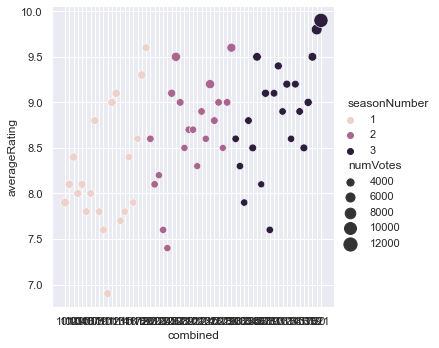

In [248]:
## Third iteration plot: scatterplot view of data, colored by season
sns.set() # 
sns.relplot(x='combined', y='averageRating', size='numVotes', sizes=(50,200), hue='seasonNumber', data=data) 
# plt.savefig('A_D_Performance_Scatter.png')
# Alternate view:
# sns.relplot(x='combined', y='averageRating', hue='numVotes', col='seasonNumber', data=data) # Full view scatterplot 
# For above code, include col='seasonNumber' if want to display all 5 seasons side by side. Q: Do the attributes
# between these resulting plots have to be shared or can we adjust things like color?

### NEXT STEPS: (1) Add episode names to the data (2) Create a table view of the episode names 
### (3) Create side by side view (subplot?) of graph and table below and on other cells

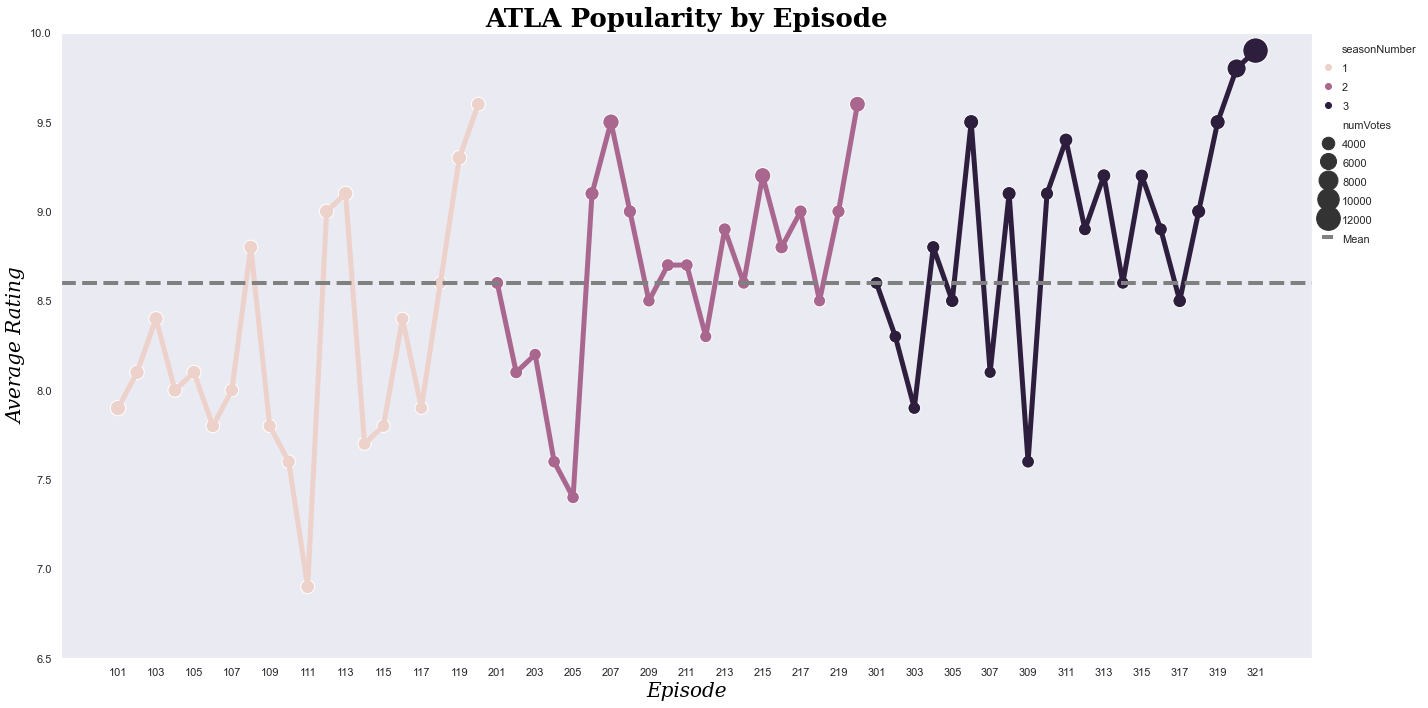

In [159]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=data, x='combined', y='averageRating', hue='seasonNumber', size='numVotes', sizes=(150,650), legend=True)
sns.lineplot(data=data, x='combined', y='averageRating', estimator='max', hue='seasonNumber', linewidth=5, legend=False)
plt.axhline(data_mean, color='gray', linestyle='--', linewidth=4, label='Mean')
font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 26,
        }
plt.title("ATLA Popularity by Episode", fontdict=font)
font['size']=20 # Update the font size
font['weight'] = 0 # Update =the font weight
plt.ylabel("Average Rating", fontdict=font, style='italic'), plt.xlabel("Episode",fontdict=font,style='italic')
plt.ylim(6.5,10)
plt.xticks(data['combined'][::2])
plt.grid(False)
plt.legend(bbox_to_anchor=(1.0, 1.0), frameon=False, handlelength=1.0, handleheight=1.5)
plt.tight_layout()
# plt.savefig('A_D_Popularity.png')

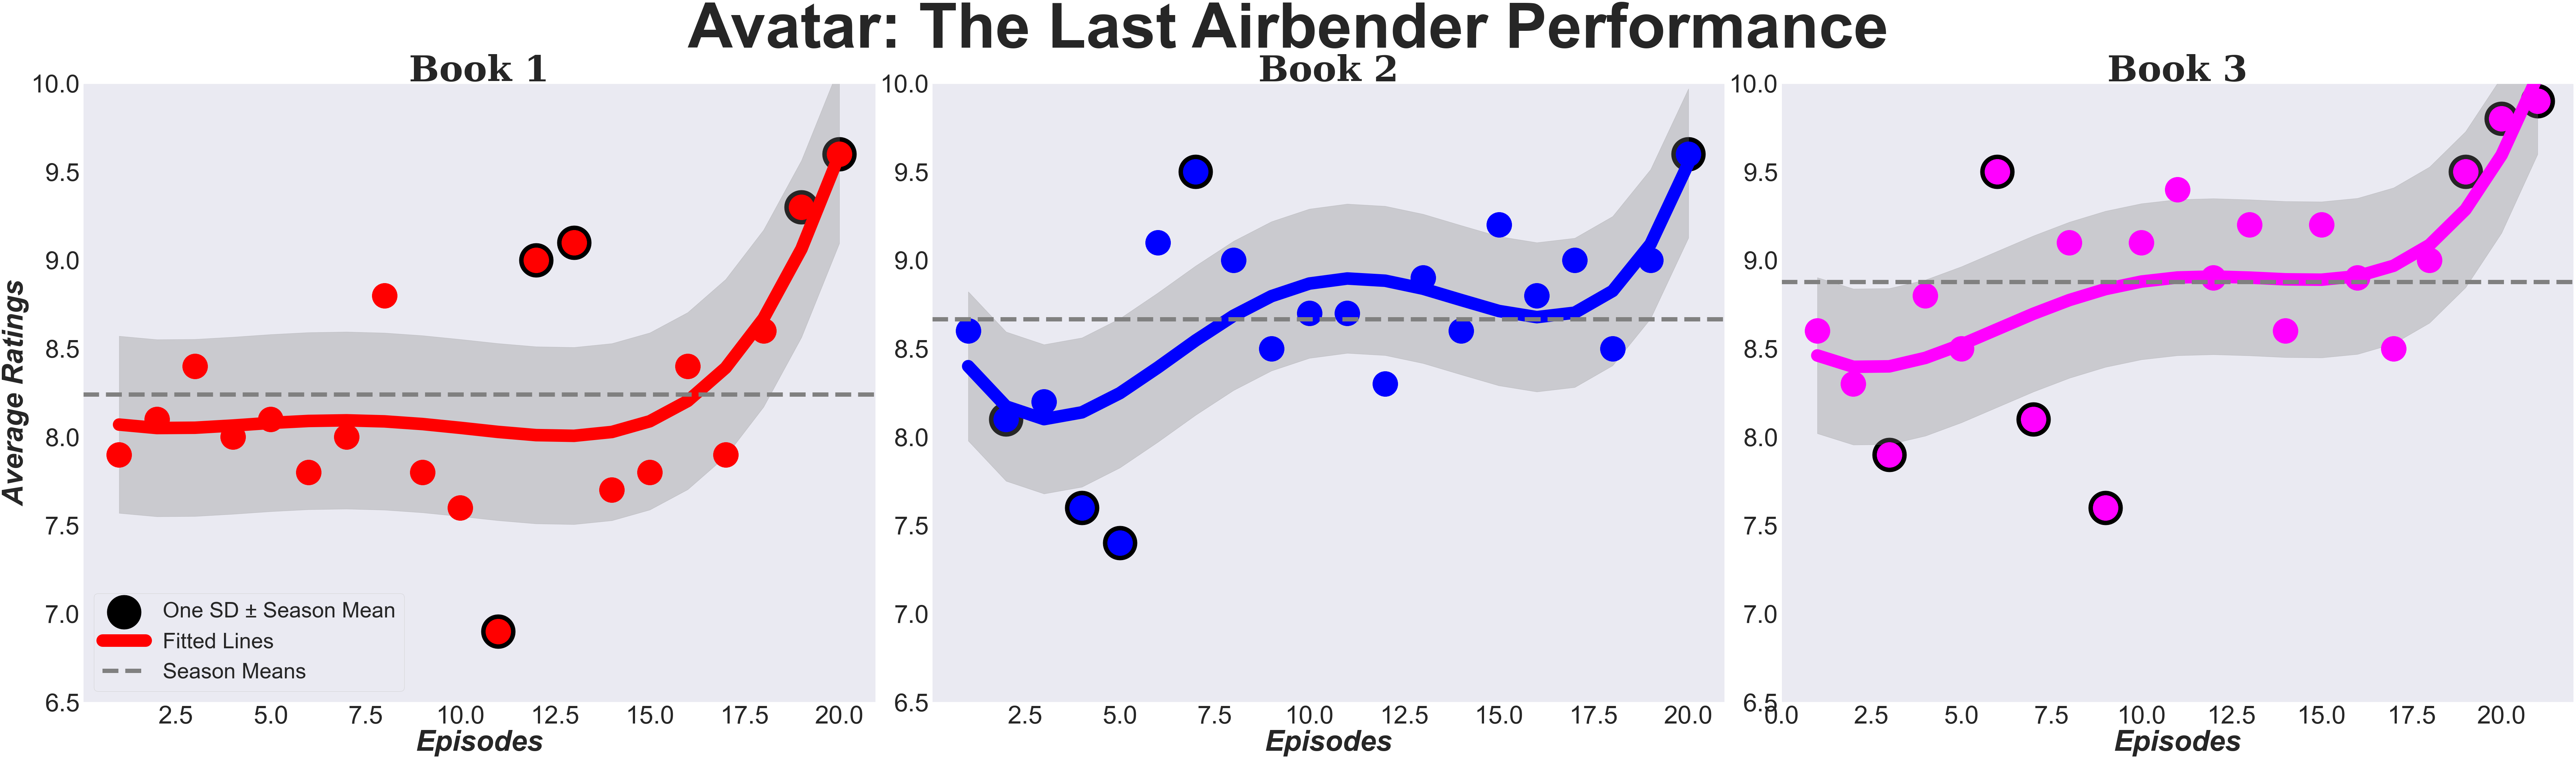

In [249]:
## In this section, we plot each season's average ratings, fit a 4th-degree polynomial to the data, 
## plot the rolling mean by season, and mark the data points which fall outside of one standard 
## deviation from the season's mean.

season_data = [s1_data, s2_data, s3_data]
fig, axs = plt.subplots(ncols=3,figsize=(100, 30))
color_arr = {
    0:'red',
    1:'blue',
    2:'magenta',
}

axs[0].set_ylabel('Average Ratings', style='italic', weight='bold', fontsize=30)
for i, s_data in enumerate(season_data):
    xs = s_data['episodeNumber'].astype(int)
    ys = s_data['averageRating']
    
    coeff = np.polyfit(xs,ys,deg=4)
    fit = np.polyval(coeff,xs)
    residuals = ys - fit
    std = np.std(residuals)
    
#     plt.xticks(s_data['episodeNumber'][::2])
    
    s_data_mean = s_data['averageRating'].mean()
    s_data_std = s_data['averageRating'].std()
    below_mean = ys < (s_data_mean-s_data_std)
    below_mean_xs = xs[below_mean]
    below_mean_ys = ys[below_mean]
    axs[i].scatter(below_mean_xs, below_mean_ys, color='black', marker='o', s=9000)
    
    
    above_mean = ys > (s_data_mean+s_data_std)
    above_mean_xs = xs[above_mean]
    above_mean_ys = ys[above_mean]
    axs[i].scatter(above_mean_xs, above_mean_ys, color='black', marker='o', s=9000, label='One SD ± Season Mean')
    

    axs[i].set_title(f'Book {i+1}', fontsize=100, weight='bold',family='serif')
    axs[i].set_titlesize = 30
    axs[i].set_ylim(6.5,10)
    axs[i].set_xlabel('Episodes', style='italic', weight='bold', fontsize=80)
    axs[0].set_ylabel('Average Ratings', style='italic', weight='bold', fontsize=80)
    axs[i].tick_params(axis='both', which='major', labelsize=70)
    axs[i].grid(False)
    axs[i].plot(xs, ys, 'o', color=color_arr[i], markersize=70) # size='numVotes'
    axs[i].plot(xs, fit, color=color_arr[i], label='Fitted Lines', linewidth=35)
    axs[i].fill_between(xs, fit - std, fit + std, color='gray', alpha=0.3) # label='1 Std. Dev.'
    axs[i].axhline(s_data_mean, color='gray', linestyle='--', linewidth=12, label='Season Means')
    axs[0].legend(loc='lower left', prop={'size': 60})

fig.suptitle("Avatar: The Last Airbender Performance", fontsize=175, fontweight='bold') # Superior title over entire figure
fig.tight_layout()    
# plt.savefig('ATLA_Relative_Mean.png')

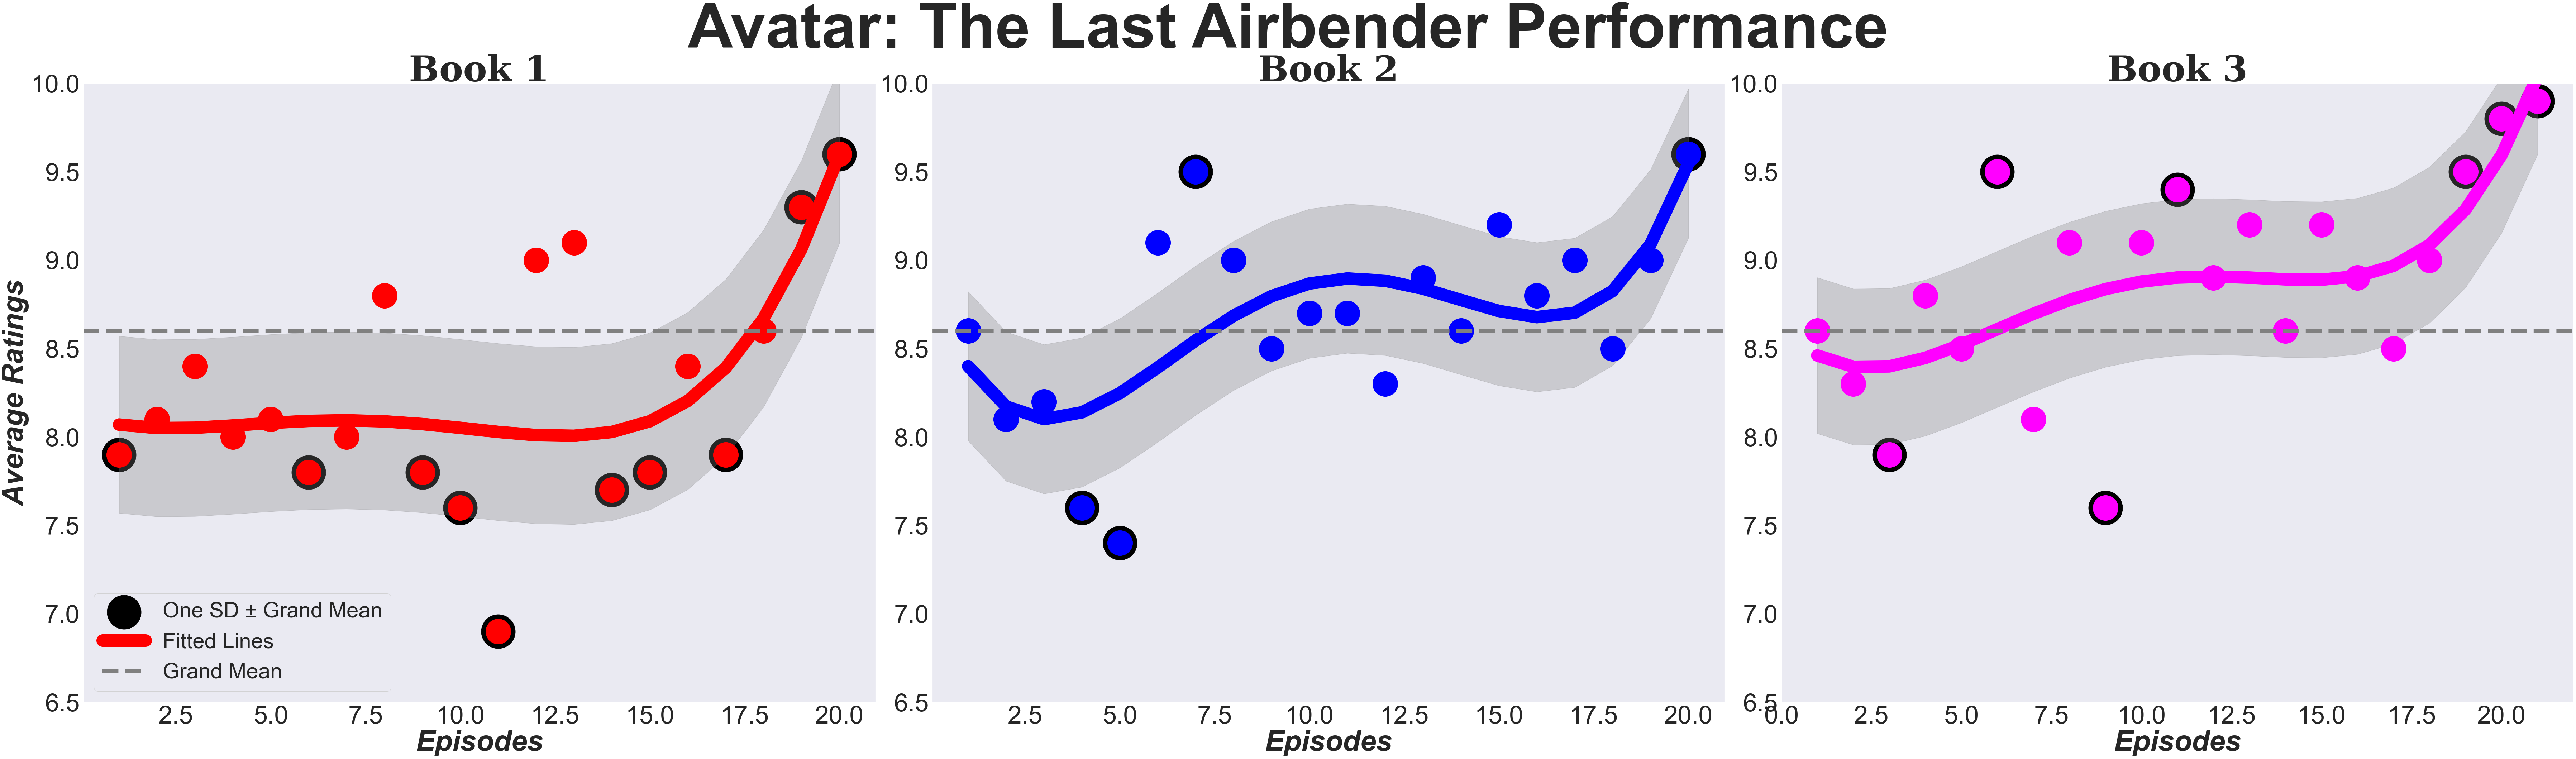

In [250]:
## Finally, we end by plotting each season's average ratings alongside the grand mean, fit a 4th-degree 
## polynomial to the data, and, once again, mark data the points which fall outside of one 
## deviation from the grand mean.

season_data = [s1_data, s2_data, s3_data]
fig, axs = plt.subplots(ncols=3,figsize=(100, 30))
color_arr = {
    0:'red',
    1:'blue',
    2:'magenta',
}

axs[0].set_ylabel('Average Ratings', style='italic', weight='bold', fontsize=30)
for i, s_data in enumerate(season_data):
    xs = s_data['episodeNumber'].astype(int)
    ys = s_data['averageRating']
    
    coeff = np.polyfit(xs,ys,deg=4)
    fit = np.polyval(coeff,xs)
    residuals = ys - fit
    std = np.std(residuals)

    below_mean = ys < (data_mean-data_std)
    below_mean_xs = xs[below_mean]
    below_mean_ys = ys[below_mean]
    axs[i].scatter(below_mean_xs, below_mean_ys, color='black', marker='o', s=9000)
    
    above_mean = ys > (data_mean+data_std)
    above_mean_xs = xs[above_mean]
    above_mean_ys = ys[above_mean]
    axs[i].scatter(above_mean_xs, above_mean_ys, color='black', marker='o', s=9000, label='One SD ± Grand Mean')
    

    axs[i].set_title(f'Book {i+1}', fontsize=100, weight='bold',family='serif')
    axs[i].set_titlesize = 30
    axs[i].set_ylim(6.5,10)
    axs[i].set_xlabel('Episodes', style='italic', weight='bold', fontsize=80)
    axs[0].set_ylabel('Average Ratings', style='italic', weight='bold', fontsize=80)
    axs[i].tick_params(axis='both', which='major', labelsize=70)
    axs[i].grid(False)
    axs[i].plot(xs, ys, 'o', color=color_arr[i], markersize=70) # size='numVotes'
    axs[i].plot(xs, fit, color=color_arr[i], label='Fitted Lines', linewidth=35)
    axs[i].fill_between(xs, fit - std, fit + std, color='gray', alpha=0.3) # label='1 Std. Dev.'
    axs[i].axhline(data['averageRating'].mean(), color='gray', linestyle='--', linewidth=12, label='Grand Mean')
    axs[0].legend(loc='lower left', prop={'size': 60})

fig.suptitle("Avatar: The Last Airbender Performance", fontsize=175, fontweight='bold') # Superior title over entire figure    
fig.tight_layout()    
plt.savefig('ATLA_Grand_Mean.png')

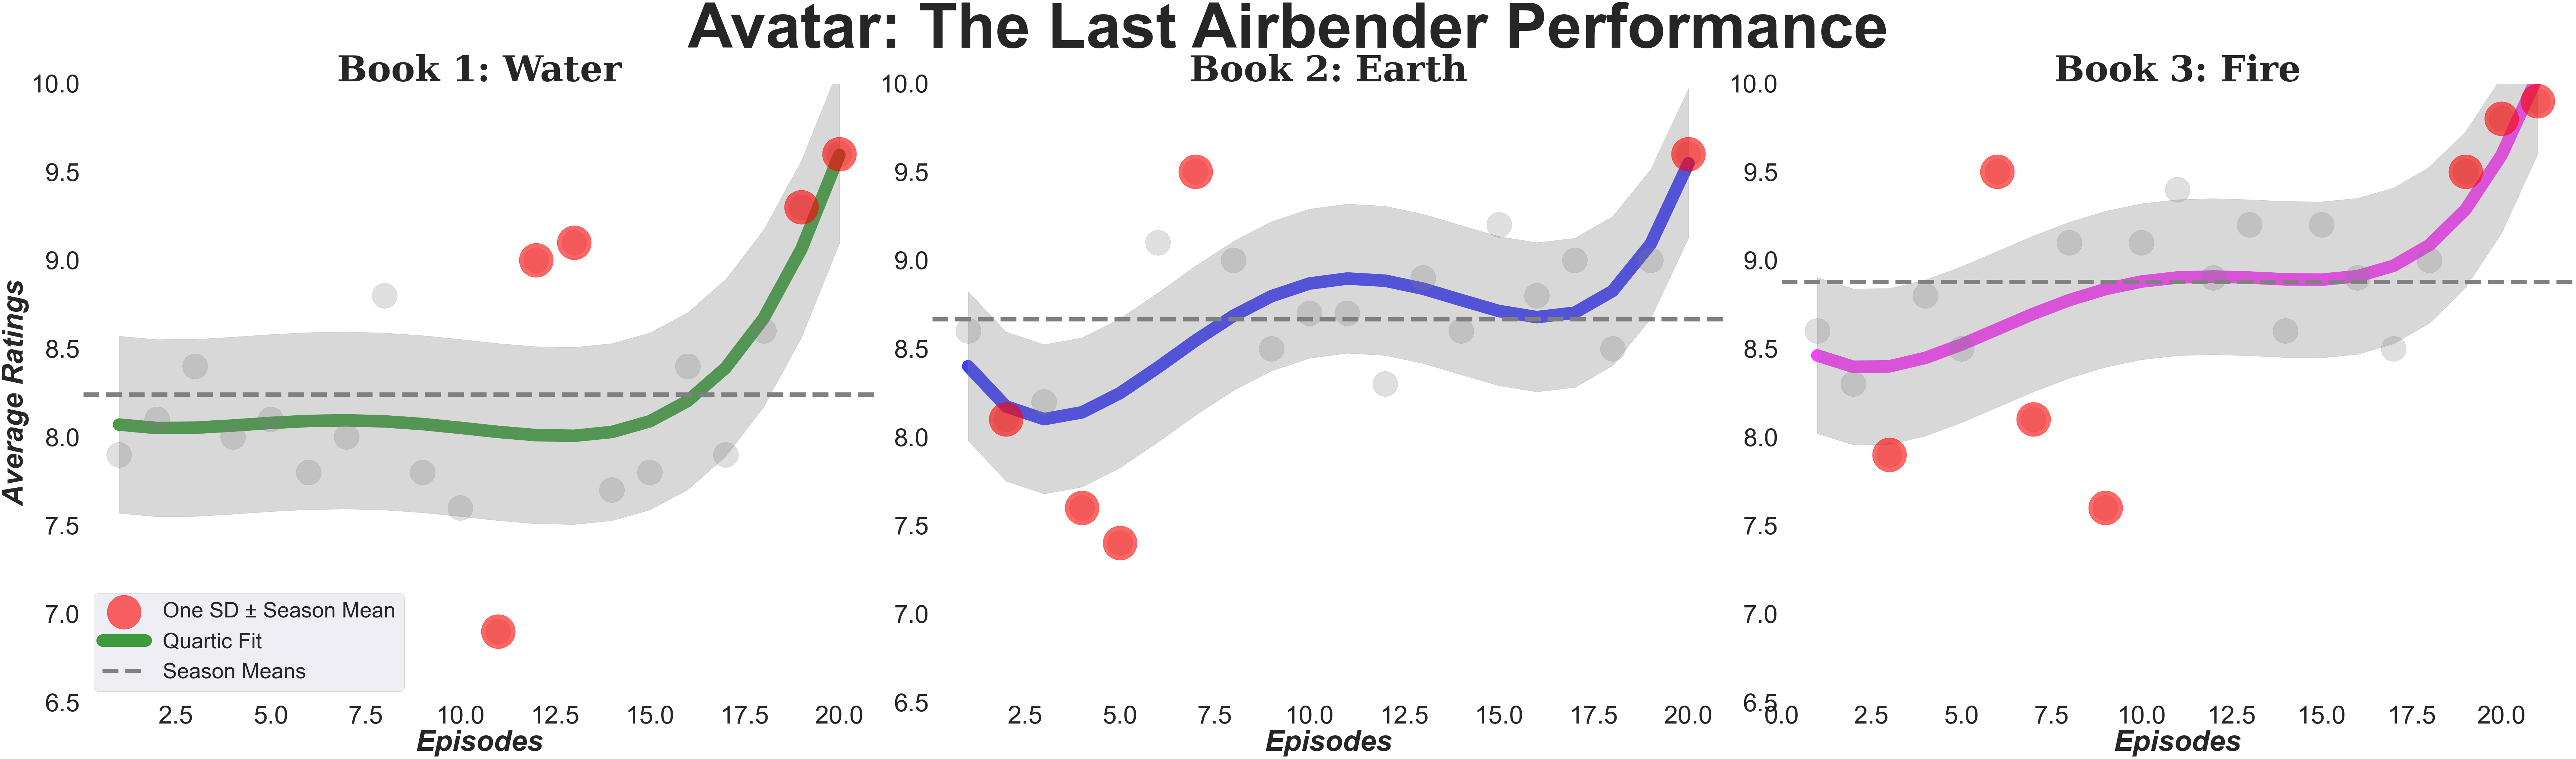

In [263]:
## In this section, we plot each season's average ratings, fit a 4th-degree polynomial to the data, 
## plot the rolling mean by season, and mark the data points which fall outside of one standard 
## deviation from the season's mean.

season_data = [s1_data, s2_data, s3_data]
fig, axs = plt.subplots(ncols=3,figsize=(100, 30))
color_arr = {
    0:'green',
    1:'blue',
    2:'magenta',
}

axs[0].set_ylabel('Average Ratings', style='italic', weight='bold', fontsize=30)
for i, s_data in enumerate(season_data):
    xs = s_data['episodeNumber'].astype(int)
    ys = s_data['averageRating']
    
    coeff = np.polyfit(xs,ys,deg=4)
    fit = np.polyval(coeff,xs)
    residuals = ys - fit
    std = np.std(residuals)

    
    s_data_mean = s_data['averageRating'].mean()
    s_data_std = s_data['averageRating'].std()
    below_mean = ys < (s_data_mean-s_data_std)
    below_mean_xs = xs[below_mean]
    below_mean_ys = ys[below_mean]
    axs[i].scatter(below_mean_xs, below_mean_ys, color='red', alpha=.6, marker='o', s=9000,zorder=3)
    
    
    above_mean = ys > (s_data_mean+s_data_std)
    above_mean_xs = xs[above_mean]
    above_mean_ys = ys[above_mean]
    axs[i].scatter(above_mean_xs, above_mean_ys, color='red', alpha=.6, marker='o', s=9000, label='One SD ± Season Mean',zorder=3)
    
    book_title = ['Water','Earth','Fire']
    axs[i].set_title(f'Book {i+1}: {book_title[i]}', fontsize=100, weight='bold',family='serif')
    axs[i].set_titlesize = 30
    axs[i].set_ylim(6.5,10)
    axs[i].set_xlabel('Episodes', style='italic', weight='bold', fontsize=80)
    axs[0].set_ylabel('Average Ratings', style='italic', weight='bold', fontsize=80)
    axs[i].tick_params(axis='both', which='major', labelsize=70)
    axs[i].grid(False)
    axs[i].plot(xs, ys, 'o', color='gray', alpha=.25, markersize=70,zorder=2) # size='numVotes'
    axs[i].plot(xs, fit, color=color_arr[i],alpha=.75, label='Quartic Fit', linewidth=35,zorder=1)
    axs[i].fill_between(xs, fit - std, fit + std, color='gray', alpha=0.3) # label='1 Std. Dev.'
    axs[i].axhline(s_data_mean, color='gray', linestyle='--', linewidth=12, label='Season Means')
    axs[0].legend(loc='lower left', prop={'size': 60})
    axs[i].patch.set_facecolor('white')
#     axs[i].patch.set_alpha(0.25)

fig.suptitle("Avatar: The Last Airbender Performance", fontsize=175, fontweight='bold') # Superior title over entire figure
fig.tight_layout()    
plt.savefig('ATLA_Relative_Mean_Highlights.png')

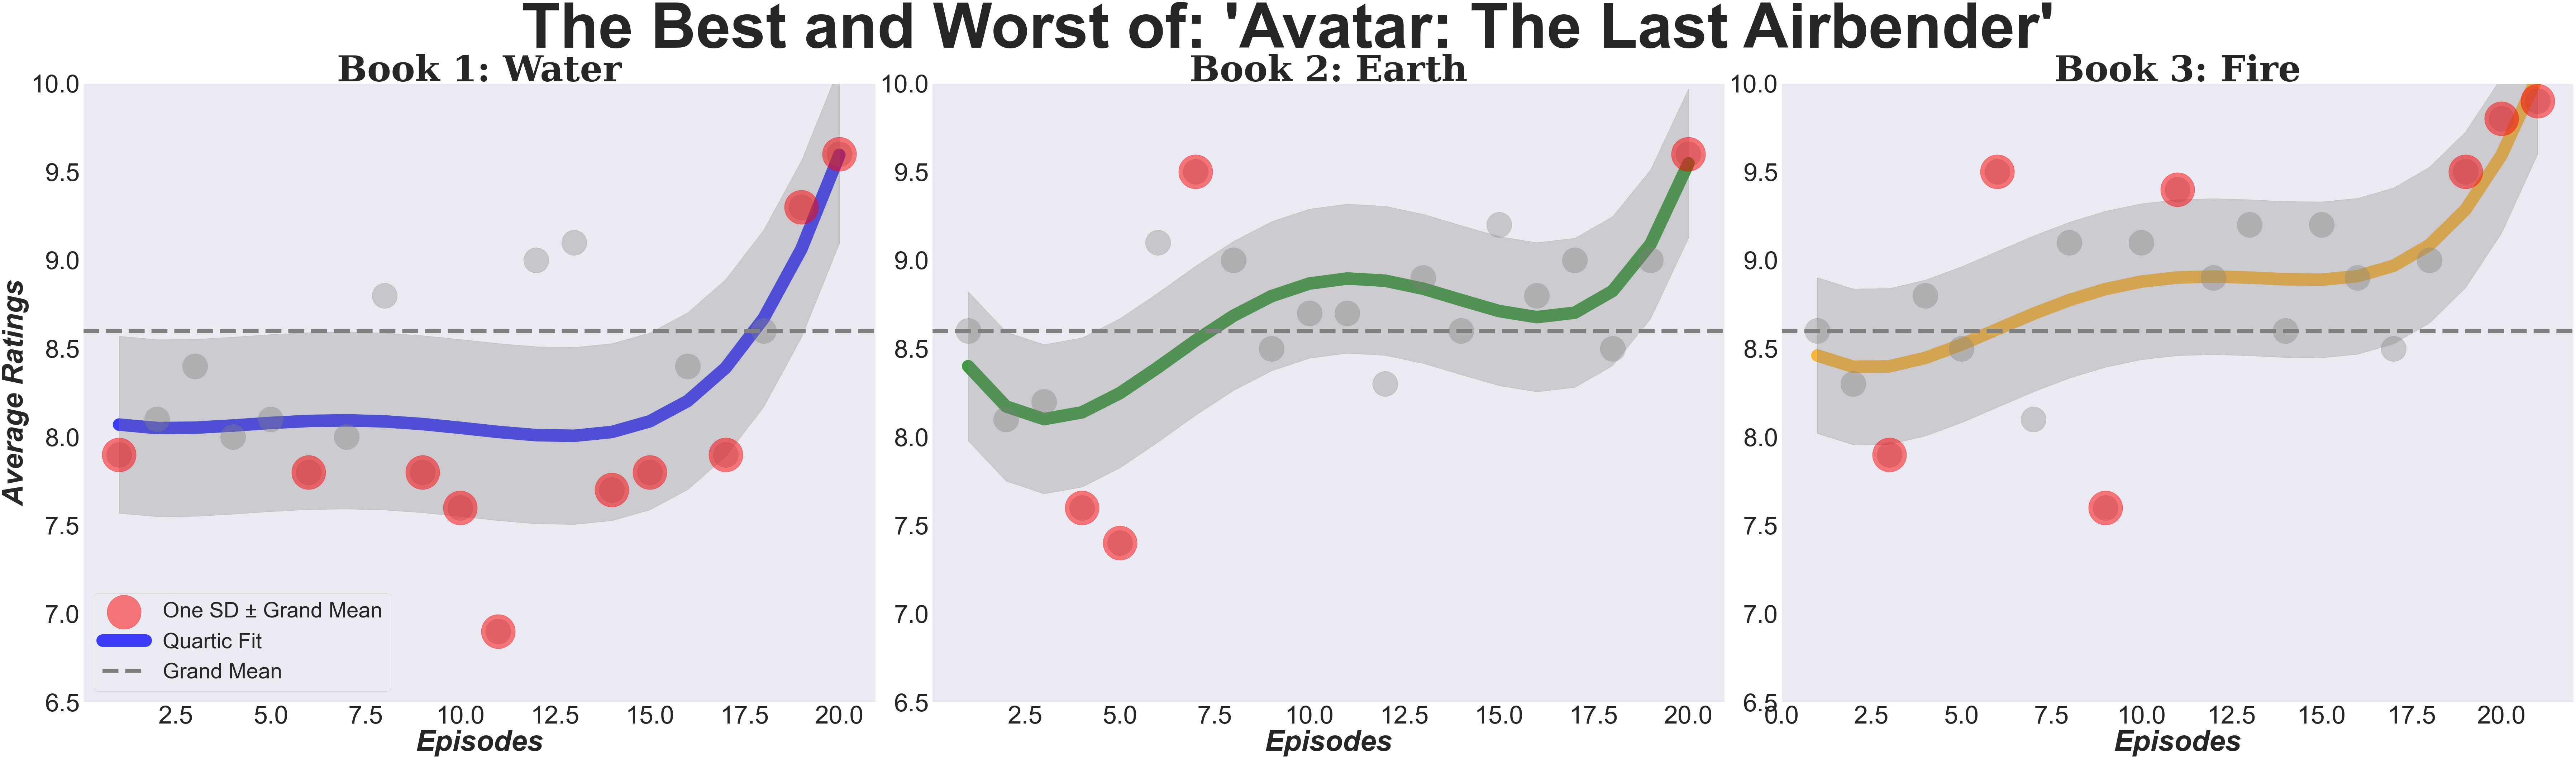

In [277]:
## Finally, we end by plotting each season's average ratings alongside the grand mean, fit a 4th-degree 
## polynomial to the data, and, once again, mark data the points which fall outside of one 
## deviation from the grand mean.

season_data = [s1_data, s2_data, s3_data]
fig, axs = plt.subplots(ncols=3,figsize=(100, 30))
color_arr = {
    0:'blue',
    1:'green',
    2:'orange',
}

axs[0].set_ylabel('Average Ratings', style='italic', weight='bold', fontsize=30)
for i, s_data in enumerate(season_data):
    xs = s_data['episodeNumber'].astype(int)
    ys = s_data['averageRating']
    
    coeff = np.polyfit(xs,ys,deg=4)
    fit = np.polyval(coeff,xs)
    residuals = ys - fit
    std = np.std(residuals)
    
    below_mean = ys < (data_mean-data_std)
    below_mean_xs = xs[below_mean]
    below_mean_ys = ys[below_mean]
    axs[i].scatter(below_mean_xs, below_mean_ys, color='red', alpha=.5, marker='o', s=9000,zorder=3)   
    
    above_mean = ys > (data_mean+data_std)
    above_mean_xs = xs[above_mean]
    above_mean_ys = ys[above_mean]
    axs[i].scatter(above_mean_xs, above_mean_ys, color='red', alpha=.5, marker='o', s=9000, zorder=3, label='One SD ± Grand Mean')   
    
    book_title = ['Water','Earth','Fire']
    axs[i].set_title(f'Book {i+1}: {book_title[i]}', fontsize=100, weight='bold',family='serif')
    axs[i].set_titlesize = 30
    axs[i].set_ylim(6.5,10)
    axs[i].set_xlabel('Episodes', style='italic', weight='bold', fontsize=80)
    axs[0].set_ylabel('Average Ratings', style='italic', weight='bold', fontsize=80)
    axs[i].tick_params(axis='both', which='major', labelsize=70)
    axs[i].grid(False)
    axs[i].plot(xs, ys, 'o', color='gray', alpha=.35, markersize=70,zorder=2) # size='numVotes'
    axs[i].plot(xs, fit, color=color_arr[i],alpha=.75, label='Quartic Fit', linewidth=35,zorder=1)
    axs[i].fill_between(xs, fit - std, fit + std, color='gray', alpha=0.3) # label='1 Std. Dev.'
    axs[i].axhline(data['averageRating'].mean(), color='gray', linestyle='--', linewidth=12, label='Grand Mean')
    axs[0].legend(loc='lower left', prop={'size': 60})

fig.suptitle("The Best and Worst of: 'Avatar: The Last Airbender'", fontsize=175, fontweight='bold') # Superior title over entire figure    
fig.tight_layout()    
plt.savefig('ATLA_Grand_Mean_Highlights.png')